In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [2]:
data = pd.read_csv('spotify_ver5_all.csv')

### release_date 以年表示

In [3]:
tem = []
for i in range(data.shape[0]):
    tem.append(data['release_date'][i].split('-')[0])
data['release_date'] = tem
data.head()

,name,id,popularity,duration_ms,release_date,artist_name,artist_id,genres,artist_followers_num,artist_popularity,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Yellow,3AJwUDP919kvQ9QcozQPxg,83,266773,2000,Coldplay,4gzpq5DPGxSnKTe4SA8HAU,permanent wave,23551766.0,93,...,0.234,-7.227,1.0,0.0281,173.365,4.0,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,0.285
1,後來,2wzXhxWPX0aODraKNXoJYY,58,341400,2000,Rene Liu,6qzfo7jiO4OrhxrvPFPlWX,c-pop,70961.0,52,...,0.174,-8.285,1.0,0.0265,149.784,4.0,https://api.spotify.com/v1/tracks/2wzXhxWPX0aO...,audio_features,spotify:track:2wzXhxWPX0aODraKNXoJYY,0.375
2,開始懂了,68tZwwRuo9ip5gRQFG1XWF,51,271493,2000,Stefanie Sun,0SIXZXJCAhNU8sxK0qm7hn,c-pop,225232.0,62,...,0.110,-6.909,0.0,0.0290,117.933,4.0,https://api.spotify.com/v1/tracks/68tZwwRuo9ip...,audio_features,spotify:track:68tZwwRuo9ip5gRQFG1XWF,0.151
3,可愛女人,14JlPNX0Z1JM7Mwfou6Xlf,45,239026,2000,Jay Chou,2elBjNSdBE2Y3f0j1mjrql,c-pop,1355834.0,77,...,0.188,-9.985,1.0,0.0306,135.446,4.0,https://api.spotify.com/v1/tracks/14JlPNX0Z1JM...,audio_features,spotify:track:14JlPNX0Z1JM7Mwfou6Xlf,0.916
4,星晴,5ZcRLLJSbTPdKMikgdMNX9,45,259399,2000,Jay Chou,2elBjNSdBE2Y3f0j1mjrql,c-pop,1355834.0,77,...,0.224,-10.374,1.0,0.0311,88.966,4.0,https://api.spotify.com/v1/tracks/5ZcRLLJSbTPd...,audio_features,spotify:track:5ZcRLLJSbTPdKMikgdMNX9,0.240


### 刪除2020年資料(1筆)

In [4]:
data = data[data['release_date']!='2020']

### overall top artist
artist_popularity > 75% 才算popular

In [5]:
df_desc = data.describe()

In [6]:
df_desc


,popularity,duration_ms,artist_followers_num,artist_popularity,acousticness,danceability,duration_ms.1,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,187397.000000,1.873970e+05,1.873970e+05,187397.000000,187397.000000,187397.000000,1.873970e+05,187397.000000,187397.000000,187397.000000,187397.000000,187397.000000,187397.000000,187397.000000,187397.000000,187397.000000,187397.000000
mean,35.583734,2.352984e+05,1.173304e+06,56.983009,0.401463,0.556627,2.352948e+05,0.566704,0.131531,5.224860,0.208100,-9.028360,0.684547,0.086714,119.254351,3.884689,0.472378
std,15.993660,1.027092e+05,3.878097e+06,17.693800,0.343304,0.170358,1.027027e+05,0.261846,0.295760,3.545914,0.191893,5.586748,0.464697,0.141759,30.346157,0.450827,0.259961
min,0.000000,1.029300e+04,0.000000e+00,0.000000,0.000000,0.000000,7.229000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1.915600e+05,1.439700e+04,46.000000,0.063500,0.447000,1.915600e+05,0.372000,0.000000,2.000000,0.097400,-10.976000,0.000000,0.032900,95.357000,4.000000,0.255000
50%,34.000000,2.270000e+05,1.012300e+05,57.000000,0.329000,0.570000,2.270000e+05,0.587000,0.000006,5.000000,0.126000,-7.434000,1.000000,0.042200,119.233000,4.000000,0.452000
75%,46.000000,2.668660e+05,5.917760e+05,69.000000,0.720000,0.681000,2.668670e+05,0.789000,0.005820,8.000000,0.253000,-5.316000,1.000000,0.069100,138.152000,4.000000,0.682000
max,100.000000,4.725263e+06,5.598031e+07,100.000000,0.996000,0.986000,4.725264e+06,1.000000,1.000000,11.000000,1.000000,1.951000,1.000000,0.970000,236.241000,5.000000,1.000000


In [7]:
# 權重計算
tlist = data[data.artist_popularity.values>= df_desc['artist_popularity']['75%'] ][['artist_popularity','artist_name']]
tlist.index =data[data.artist_popularity.values>= df_desc['artist_popularity']['75%'] ].artist_name
tlist = tlist.drop_duplicates(['artist_name'])
tlist = tlist['artist_popularity']
print(type(tlist))
tlist.sort_values(ascending=False)

<class 'pandas.core.series.Series'>


artist_name
Post Malone                      100
J Balvin                          99
Drake                             99
Billie Eilish                     98
Ozuna                             98
Bad Bunny                         98
Juice WRLD                        98
Ed Sheeran                        98
Travis Scott                      97
Ariana Grande                     97
Camila Cabello                    96
Khalid                            96
Anuel AA                          96
Kanye West                        95
XXXTENTACION                      95
Farruko                           95
Daddy Yankee                      95
Justin Bieber                     95
Taylor Swift                      95
The Weeknd                        95
Chris Brown                       94
Shawn Mendes                      94
Harry Styles                      94
Sech                              94
Eminem                            94
Nicky Jam                         94
DaBaby                    

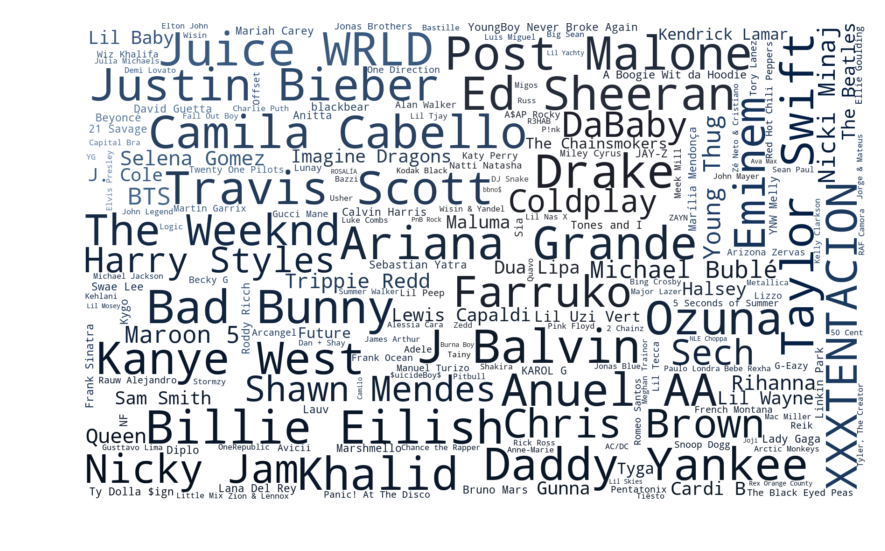

In [8]:
from PIL import Image
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
string=' '.join(data[data.artist_popularity.values>= df_desc['artist_popularity']['75%'] ].artist_name)
plt.figure(dpi=150) 
# 設定字體（要能支援中文顯示的）
font_path = '/System/Library/Fonts/PingFang.ttc'  
# 讀背景圖片
background_Image = np.array(Image.open("1.png"))
# 提取背景圖片顏色
img_colors = ImageColorGenerator(background_Image)
# 設置stopwords 
stopwords = set(STOPWORDS)
#stopwords.add('object')           #如果有顯眼的無關詞，要加入到stopword
wc = WordCloud(
        #font_path = font_path,    # 字體路徑
        margin = 2,                # 頁面邊緣
        mask = background_Image,
        #scale = 3,
        max_words = 200,          # 最多顯示多少詞
        min_font_size = 4,        # 最小的字的字體大小
        stopwords = stopwords,
        random_state = 42,
        background_color = 'white', # 背景颜色
        max_font_size = 100,
)
#wc.generate(string)
wc.generate_from_frequencies(tlist)
wc.recolor(color_func = img_colors)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()    

In [11]:
# 權重計算
tlist2 = data[data.popularity.values>=df_desc['popularity']['75%']  ][['popularity','name']]
tlist2.index =data[data.popularity.values>= df_desc['popularity']['75%'] ].artist_name
tlist2 = tlist2.drop_duplicates(['name'])
tlist2 = tlist2['popularity']
print(type(tlist2))
tlist.sort_values(ascending=False)

<class 'pandas.core.series.Series'>


artist_name
Post Malone                      100
J Balvin                          99
Drake                             99
Billie Eilish                     98
Ozuna                             98
Bad Bunny                         98
Juice WRLD                        98
Ed Sheeran                        98
Travis Scott                      97
Ariana Grande                     97
Camila Cabello                    96
Khalid                            96
Anuel AA                          96
Kanye West                        95
XXXTENTACION                      95
Farruko                           95
Daddy Yankee                      95
Justin Bieber                     95
Taylor Swift                      95
The Weeknd                        95
Chris Brown                       94
Shawn Mendes                      94
Harry Styles                      94
Sech                              94
Eminem                            94
Nicky Jam                         94
DaBaby                    

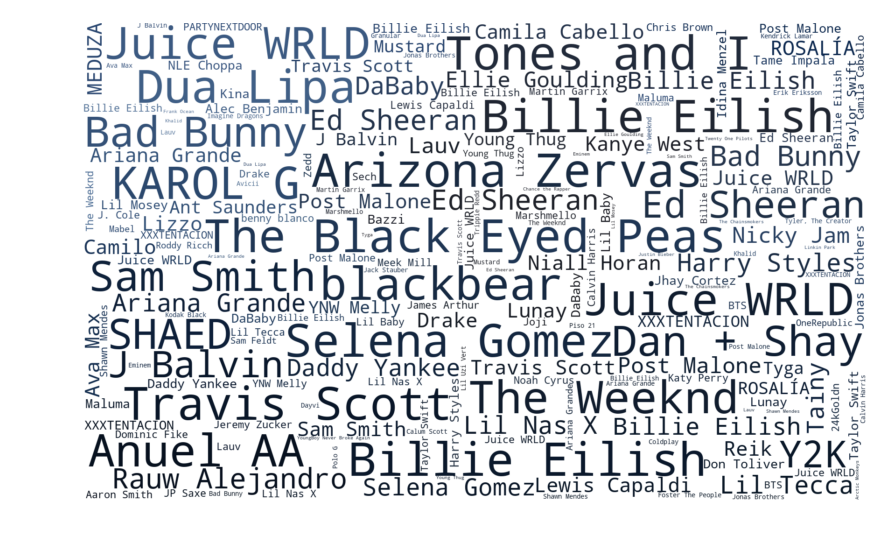

In [12]:
from PIL import Image
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
string=' '.join(data[data.popularity.values>= df_desc['popularity']['75%'] ].name)
plt.figure(dpi=150) 
# 設定字體（要能支援中文顯示的）
font_path = '/System/Library/Fonts/PingFang.ttc'  
# 讀背景圖片
background_Image = np.array(Image.open("1.png"))
# 提取背景圖片顏色
img_colors = ImageColorGenerator(background_Image)
# 設置stopwords 
stopwords = set(STOPWORDS)
#stopwords.add('object')           #如果有顯眼的無關詞，要加入到stopword
wc = WordCloud(
        #font_path = font_path,    # 字體路徑
        margin = 2,                # 頁面邊緣
        mask = background_Image,
        #scale = 3,
        max_words = 200,          # 最多顯示多少詞
        min_font_size = 4,        # 最小的字的字體大小
        stopwords = stopwords,
        random_state = 42,
        background_color = 'white', # 背景颜色
        max_font_size = 100,
)
#wc.generate(string)
wc.generate_from_frequencies(tlist2)
wc.recolor(color_func = img_colors)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()    